In [1]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


In [2]:
!pip3 uninstall -y keras
!pip uninstall -y keras-nightly

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0


In [3]:
!pip3 install keras==2.2.4

     |████████████████████████████████| 312 kB 13.4 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 


In [4]:
!pip3 install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.1 MB 9.8 kB/s 
     |████████████████████████████████| 488 kB 38.8 MB/s 
     |████████████████████████████████| 3.1 MB 38.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


In [5]:
!pip3 install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 12.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [6]:
from google.colab import files
files.upload() # Browse for the kaggle.json file that you downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sashanksridhar","key":"71dbeb894347489492b990ed7f9ef235"}'}

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-13 06:53:06          10646  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6508  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2452  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2647  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [8]:
 !kaggle datasets download -d grassknoted/asl-alphabet

 98% 1.01G/1.03G [00:27<00:00, 41.1MB/s]
100% 1.03G/1.03G [00:27<00:00, 39.5MB/s]


In [9]:
!unzip asl-alphabet.zip -d asl-alphabet

Streaming output truncated to the last 5000 lines.
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl-alphabet/asl_alphabet_train/asl_alp

In [10]:
from math import ceil

n_points = 69600
batch_size = 512

steps_per_epoch = ceil(n_points / batch_size)
validation_steps = ceil(17400/512)

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2)
train_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='training', batch_size=512, target_size=(64,64), seed=72)
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72)

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [12]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [13]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils
from keras import initializers, layers

In [14]:
sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"

WEIGHTS_PATH = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_NO_TOP = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels_notop.h5"


In [15]:
def fire_module(x, fire_id, squeeze=16, expand=64):
    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3
    
    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x


In [16]:
def SqueezeNet(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None,
               classes=1000):
    """Instantiates the SqueezeNet architecture.
    """
        
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    input_shape = _obtain_input_shape(input_shape,
                                      default_size=227,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor


    x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid', name='conv1')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    
    if include_top:
        # It's not obvious where to cut the network... 
        # Could do the 8th or 9th layer... some work recommends cutting earlier layers.
    
        x = Dropout(0.5, name='drop9')(x)

        x = Convolution2D(classes, (1, 1), padding='valid', name='conv10')(x)
        x = Activation('relu', name='relu_conv10')(x)
        x = GlobalAveragePooling2D()(x)
        x = Activation('softmax', name='loss')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling=='max':
            x = GlobalMaxPooling2D()(x)
        elif pooling==None:
            pass
        else:
            raise ValueError("Unknown argument for 'pooling'=" + pooling)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs, x, name='squeezenet')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        else:
            weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models')
            
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    return model

In [17]:
class Length(layers.Layer):
    """
    Compute the length of vectors. This is used to compute a Tensor that has the same shape with y_true in margin_loss.
    Using this layer as model's output can directly predict labels by using `y_pred = np.argmax(model.predict(x), 1)`
    inputs: shape=[None, num_vectors, dim_vector]
    output: shape=[None, num_vectors]
    """
    def __init__(self, **kwargs):
        super(Length, self).__init__(**kwargs)
    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        config = super(Length, self).get_config()
        return config


class Mask(layers.Layer):
    """
    Mask a Tensor with shape=[None, num_capsule, dim_vector] either by the capsule with max length or by an additional 
    input mask. Except the max-length capsule (or specified capsule), all vectors are masked to zeros. Then flatten the
    masked Tensor.
    For example:
        ```
        x = keras.layers.Input(shape=[8, 3, 2])  # batch_size=8, each sample contains 3 capsules with dim_vector=2
        y = keras.layers.Input(shape=[8, 3])  # True labels. 8 samples, 3 classes, one-hot coding.
        out = Mask()(x)  # out.shape=[8, 6]
        # or
        out2 = Mask()([x, y])  # out2.shape=[8,6]. Masked with true labels y. Of course y can also be manipulated.
        ```
    """
    def __init__(self, **kwargs):
        super(Mask, self).__init__(**kwargs)
    def call(self, inputs, **kwargs):
        if type(inputs) is list:  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, mask = inputs
        else:  # if no true label, mask by the max length of capsules. Mainly used for prediction
            # compute lengths of capsules
            x = K.sqrt(K.sum(K.square(inputs), -1))
            # generate the mask which is a one-hot code.
            # mask.shape=[None, n_classes]=[None, num_capsule]
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=x.get_shape().as_list()[1])

        # inputs.shape=[None, num_capsule, dim_capsule]
        # mask.shape=[None, num_capsule]
        # masked.shape=[None, num_capsule * dim_capsule]
        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])

    def get_config(self):
        config = super(Mask, self).get_config()
        return config


def squash(vectors, axis=-1):
    """
    The non-linear activation used in Capsule. It drives the length of a large vector to near 1 and small vector to 0
    :param vectors: some vectors to be squashed, N-dim tensor
    :param axis: the axis to squash
    :return: a Tensor with same shape as input vectors
    """
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors


class CapsuleLayer(layers.Layer):
    """
    The capsule layer. It is similar to Dense layer. Dense layer has `in_num` inputs, each is a scalar, the output of the 
    neuron from the former layer, and it has `out_num` output neurons. CapsuleLayer just expand the output of the neuron
    from scalar to vector. So its input shape = [None, input_num_capsule, input_dim_capsule] and output shape = \
    [None, num_capsule, dim_capsule]. For Dense Layer, input_dim_capsule = dim_capsule = 1.
    
    :param num_capsule: number of capsules in this layer
    :param dim_capsule: dimension of the output vectors of the capsules in this layer
    :param routings: number of iterations for the routing algorithm
    """
    def __init__(self, num_capsule, dim_capsule, routings=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=[self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule],
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.built = True

    def call(self, inputs, training=None):
        # inputs.shape=[None, input_num_capsule, input_dim_capsule]
        # inputs_expand.shape=[None, 1, input_num_capsule, input_dim_capsule]
        inputs_expand = K.expand_dims(inputs, 1)

        # Replicate num_capsule dimension to prepare being multiplied by W
        # inputs_tiled.shape=[None, num_capsule, input_num_capsule, input_dim_capsule]
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsule, 1, 1])

        # Compute `inputs * W` by scanning inputs_tiled on dimension 0.
        # x.shape=[num_capsule, input_num_capsule, input_dim_capsule]
        # W.shape=[num_capsule, input_num_capsule, dim_capsule, input_dim_capsule]
        # Regard the first two dimensions as `batch` dimension,
        # then matmul: [input_dim_capsule] x [dim_capsule, input_dim_capsule]^T -> [dim_capsule].
        # inputs_hat.shape = [None, num_capsule, input_num_capsule, dim_capsule]
        inputs_hat = K.map_fn(lambda x: K.batch_dot(x, self.W, [2, 3]), elems=inputs_tiled)

        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].
        b = tf.zeros(shape=[K.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule])

        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
            # c.shape=[batch_size, num_capsule, input_num_capsule]
            c = tf.nn.softmax(b, dim=1)

            # c.shape =  [batch_size, num_capsule, input_num_capsule]
            # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
            # The first two dimensions as `batch` dimension,
            # then matmal: [input_num_capsule] x [input_num_capsule, dim_capsule] -> [dim_capsule].
            # outputs.shape=[None, num_capsule, dim_capsule]
            outputs = squash(K.batch_dot(c, inputs_hat, [2, 2]))  # [None, 10, 16]

            if i < self.routings - 1:
                # outputs.shape =  [None, num_capsule, dim_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [dim_capsule] x [input_num_capsule, dim_capsule]^T -> [input_num_capsule].
                # b.shape=[batch_size, num_capsule, input_num_capsule]
                b += K.batch_dot(outputs, inputs_hat, [2, 3])
        # End: Routing algorithm -----------------------------------------------------------------------#

        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(CapsuleLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding, name, count):
    """
    Apply Conv2D `n_channels` times and concatenate all capsules
    :param inputs: 4D tensor, shape=[None, width, height, channels]
    :param dim_capsule: the dim of the output vector of capsule
    :param n_channels: the number of types of capsules
    :return: output tensor, shape=[None, num_capsule, dim_capsule]
    """
    output = layers.Conv2D(filters=dim_capsule*n_channels, kernel_size=kernel_size, strides=strides, padding=padding,
                           name=name)(inputs)
    outputs = layers.Reshape(target_shape=[-1, dim_capsule], name=name+'i'+ str(count))(output)
    return layers.Lambda(squash, name=name+ 'j' +str(count))(outputs)


"""
# The following is another way to implement primary capsule layer. This is much slower.
# Apply Conv2D `n_channels` times and concatenate all capsules
def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding):
    outputs = []
    for _ in range(n_channels):
        output = layers.Conv2D(filters=dim_capsule, kernel_size=kernel_size, strides=strides, padding=padding)(inputs)
        outputs.append(layers.Reshape([output.get_shape().as_list()[1] ** 2, dim_capsule])(output))
    outputs = layers.Concatenate(axis=1)(outputs)
    return layers.Lambda(squash)(outputs)
"""

'\n# The following is another way to implement primary capsule layer. This is much slower.\n# Apply Conv2D `n_channels` times and concatenate all capsules\ndef PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding):\n    outputs = []\n    for _ in range(n_channels):\n        output = layers.Conv2D(filters=dim_capsule, kernel_size=kernel_size, strides=strides, padding=padding)(inputs)\n        outputs.append(layers.Reshape([output.get_shape().as_list()[1] ** 2, dim_capsule])(output))\n    outputs = layers.Concatenate(axis=1)(outputs)\n    return layers.Lambda(squash)(outputs)\n'

In [18]:
from keras.utils import to_categorical
import numpy as np
from keras import layers, models, optimizers

In [19]:
K.set_image_data_format('channels_last')
K.clear_session()

In [ ]:

mod=SqueezeNet(include_top=False, weights='imagenet',input_shape=(64,64,3))




3039232/3032184 [==============================] - 0s 0us/step


In [20]:
from keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
primarycaps = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="1", count=1)

   
digitcaps = CapsuleLayer(num_capsule=29, dim_capsule=2, routings=2,
                             name='digitcaps')(primarycaps)
    

out_caps = Length(name='capsnet')(digitcaps)

model = models.Model([mod.input], [out_caps])

Instructions for updating:
dim is deprecated, use axis instead


In [ ]:
gbl=GlobalAveragePooling2D()(mod.output)
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
out=Dense(29,activation='softmax')(gbl)
model=Model(inputs=mod.input,outputs=out)

In [21]:
from keras.optimizers import Adam

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [ ]:
summary=model.fit_generator(train_generator, epochs=5, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/Squeeze_model.h5")

Epoch 1/5
136/136 [==============================] - 61s 446ms/step - loss: 3.2942 - acc: 0.0693
Epoch 2/5
136/136 [==============================] - 60s 443ms/step - loss: 1.2148 - acc: 0.6022
Epoch 3/5
136/136 [==============================] - 60s 445ms/step - loss: 0.1556 - acc: 0.9456
Epoch 4/5
136/136 [==============================] - 62s 455ms/step - loss: 0.0672 - acc: 0.9776
Epoch 5/5
136/136 [==============================] - 61s 447ms/step - loss: 0.0319 - acc: 0.9893


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[551   2   0   0  19   1   0   0   0   0   0   6  14   0   0   0   0   0
    0   0   0   0   7   0   0   0   0   0   0]
 [  0 599   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 569   0   0   0   0   0   0   0   0   5   0   0  26   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   7 566   0   0   0   0   3   0   0   0   0   0  22   0   0   0
    1   0   0   0   0   0   0   0   0   0   0]
 [  3   6   0  16 549   0   0   0  13   0   0   2   1   0   5   0   0   0
    0   0   0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   0 600   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 481  20   1  24   0   0   0   3   0  58   0   1
    0   0   0   0   0   0   1   0   2   0   9]
 [  0   0   0   0   0   0  12 553   0   1   0   0   0   1   0  32   0   1
    0   0   0   0   0   0   0   0  

In [ ]:
c_matrix = confusion_matrix(y_true, predicted_class_indices)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

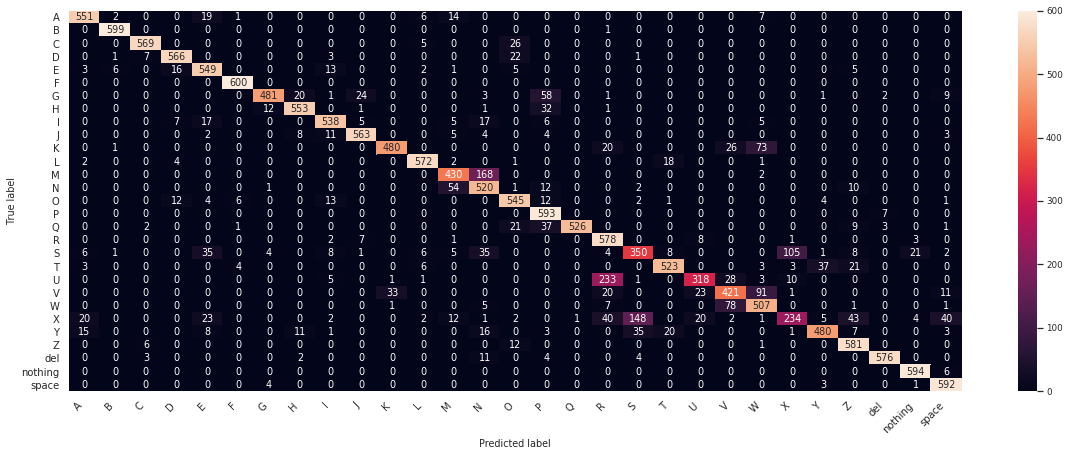

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_names= validation_generator.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=10)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/squ

In [ ]:
summary=model.fit_generator(train_generator, epochs=5, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/SqueezeCaps_model.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
136/136 [==============================] - 99s 726ms/step - loss: 1.2994 - acc: 0.8317
Epoch 2/5
136/136 [==============================] - 93s 684ms/step - loss: 0.3327 - acc: 0.9901
Epoch 3/5
136/136 [==============================] - 92s 675ms/step - loss: 0.2082 - acc: 0.9937
Epoch 4/5
136/136 [==============================] - 93s 687ms/step - loss: 0.1591 - acc: 0.9941
Epoch 5/5
136/136 [==============================] - 91s 671ms/step - loss: 0.1220 - acc: 0.9969


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[587   1   0   0   1   0   0   0   0   0   0   0   0   0   5   0   0   0
    6   0   0   0   0   0   0   0   0   0   0]
 [  0 599   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  0   0 598   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   6 592   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0 585   0   0   0   0   0   0   0   0   0   9   0   0   0
    2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 560   0   0   0   0   0   0   0   0  40   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0 556  16   3   0   0   0   0  15   0   3   0   0
    0   0   1   3   0   0   0   0   0   1   0]
 [  0   5   0   0   0   0   0 584   0  11   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  

In [ ]:
c_matrix = confusion_matrix(y_true, predicted_class_indices)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

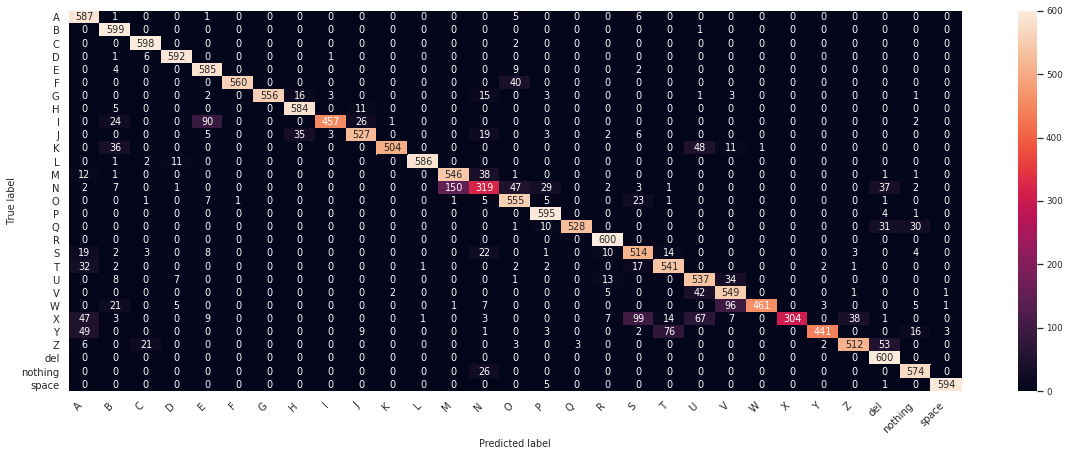

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_names= validation_generator.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=10)

In [ ]:
# Multilane

In [ ]:
primarycaps = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="1", count=1)

primarycaps1 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="2", count=2)

capsule = layers.concatenate([primarycaps, primarycaps1], axis=-1)
   
digitcaps = CapsuleLayer(num_capsule=29, dim_capsule=2, routings=2,
                             name='digitcaps')(capsule)
    

out_caps = Length(name='capsnet')(digitcaps)

model = models.Model([mod.input], [out_caps])

Instructions for updating:
dim is deprecated, use axis instead


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/squ

In [ ]:
summary=model.fit_generator(train_generator, epochs=5, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/SqueezeCapsMultiLane-2layers_model.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
136/136 [==============================] - 93s 684ms/step - loss: 0.9569 - acc: 0.8465
Epoch 2/5
136/136 [==============================] - 85s 625ms/step - loss: 0.1733 - acc: 0.9928
Epoch 3/5
136/136 [==============================] - 86s 631ms/step - loss: 0.1075 - acc: 0.9961
Epoch 4/5
136/136 [==============================] - 86s 632ms/step - loss: 0.0878 - acc: 0.9950
Epoch 5/5
136/136 [==============================] - 86s 630ms/step - loss: 0.0709 - acc: 0.9956


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[564   1   0   0   8   0   0   0   0   0   0   0   4   0   7   0   0   0
   14   2   0   0   0   0   0   0   0   0   0]
 [  0 598   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 594   0   0   0   0   0   0   0   0   0   0   0   6   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   6 586   0   0   0   0   1   0   0   0   0   0   0   0   0   7
    0   0   0   0   0   0   0   0   0   0   0]
 [  1   2   0   0 579   1   0   0   0   0   0   0   0   0   0   0   0   0
   17   0   0   0   0   0   0   0   0   0   0]
 [  0   0   3   0   0 593   0   0   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 539  44   2   4   0   0   0   0   0   2   0   0
    8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5 594   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  

In [ ]:
c_matrix = confusion_matrix(y_true, predicted_class_indices)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

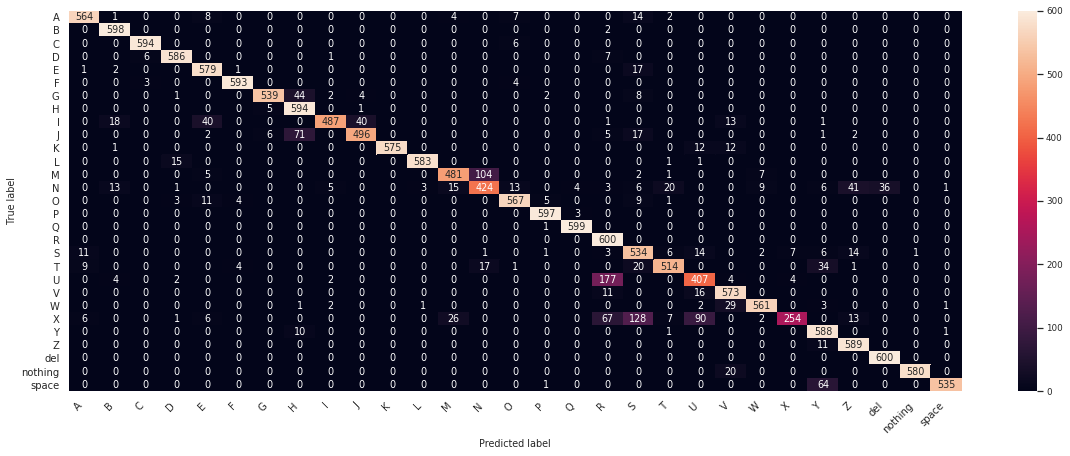

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_names= validation_generator.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=10)

In [22]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/SqueezeCapsMultiLane-2layers_model.h5", custom_objects={'PrimaryCap': PrimaryCap,'CapsuleLayer':CapsuleLayer,'Length':Length})




Instructions for updating:
dim is deprecated, use axis instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes

Found 17400 images belonging to 29 classes.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [ ]:
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_true, predicted_class_indices)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_true, predicted_class_indices, average='micro')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_true, predicted_class_indices, average='micro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, predicted_class_indices, average='micro')
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_true, predicted_class_indices)
print('Cohens kappa: %f' % kappa)

# ROC AUC
# auc = roc_auc_score(Yt_1, p_1)
# print('ROC AUC: %f' % auc)



Accuracy: 0.907529
Precision: 0.907529
Recall: 0.907529
F1 score: 0.907529
Cohens kappa: 0.904226


In [ ]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            
            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])
            
            print(len(fpr["avg / total"]))
            print(len(tpr["avg / total"]))
            plt.plot(fpr["avg / total"],tpr["avg / total"],label="(area = {:.3f})".format(roc_auc["avg / total"]))
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            print(fpr)
            print(tpr)

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)
        

    return class_report_df

68967
68967
             precision    recall  f1-score  support     pred       AUC
0             0.954315  0.940000  0.947103    600.0    591.0  0.996115
1             0.938776  0.996667  0.966855    600.0    637.0  0.999980
2             0.985075  0.990000  0.987531    600.0    603.0  0.999954
3             0.962233  0.976667  0.969396    600.0    609.0  0.999546
4             0.889401  0.965000  0.925659    600.0    651.0  0.999090
5             0.985050  0.988333  0.986689    600.0    602.0  0.999985
6             0.980000  0.898333  0.937391    600.0    550.0  0.996558
7             0.825000  0.990000  0.900000    600.0    720.0  0.997565
8             0.975952  0.811667  0.886260    600.0    499.0  0.988770
9             0.916821  0.826667  0.869413    600.0    541.0  0.954658
10            1.000000  0.958333  0.978723    600.0    575.0  0.993012
11            0.993186  0.971667  0.982308    600.0    587.0  0.999814
12            0.914449  0.801667  0.854352    600.0    526.0  0.9

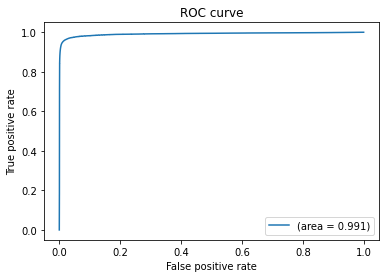

In [ ]:
print(class_report(y_true, predicted_class_indices,pred))

In [ ]:
cnf_matrix = confusion_matrix(y_true, predicted_class_indices)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accurzacy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
print(TPR.mean())
print(FPR.mean())
print(TNR.mean())
print(FNR.mean())

0.9075287356321837
0.003302545155993432
0.9966974548440068
0.0924712643678161


In [110]:
def GradCamPlusPlus(model, img_array, layer_name):
    cls = np.argmax(model.predict(img_array))
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    grads = tf.gradients(y_c, conv_output)[0]
    # grads = normalize(grads)

    first = K.exp(y_c)*grads
    second = K.exp(y_c)*grads*grads
    third = K.exp(y_c)*grads*grads*grads

    gradient_function = K.function([model.input], [y_c,first,second,third, conv_output, grads])
    y_c, conv_first_grad, conv_second_grad,conv_third_grad, conv_output, grads_val = gradient_function([img_array])
    global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num/alpha_denom

    weights = np.maximum(conv_first_grad[0], 0.0)
    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)
    alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))
    deep_linearization_weights = np.sum((weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)

    cam = np.sum(deep_linearization_weights*conv_output[0], axis=2)
    cam = np.maximum(cam, 0)  # Passing through ReLU
    cam /= np.max(cam) # scale 0 to 1.0  

    return cam

In [106]:
def GradCam(model, img_array, layer_name):
    cls = np.argmax(model.predict(img_array))
    
    """GradCAM method for visualizing input saliency."""
    y_c = model.output[0, cls]
    conv_output = model.get_layer(layer_name).output
    grads = tf.gradients(y_c, conv_output)[0]
    # grads = normalize(grads)

    gradient_function = K.function([model.input], [conv_output, grads])
    output, grads_val = gradient_function([img_array])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    weights = np.mean(grads_val, axis=(0, 1))

    cam = np.dot(output, weights)
    cam = np.maximum(cam, 0)  # Passing through ReLU
    cam /= np.max(cam)  # scale 0 to 1.0  

    return cam

In [25]:
import numpy as np
import cv2
image = cv2.imread('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/W_test.jpg')
image = cv2.resize(image, (64, 64))
image = image.astype('float32') / 255
image = np.expand_dims(image, axis=0)

preds = model.predict(image) 
i = np.argmax(preds[0])

In [91]:
def read_and_preprocess_img(path, size=(64,64)):
    img = load_img(path, target_size=size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

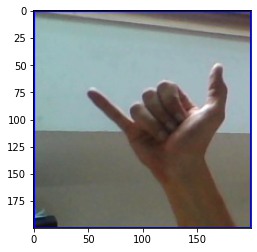

In [126]:
from keras.preprocessing.image import load_img, img_to_array
orig_img = np.array(load_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Y_test.jpg'),dtype=np.uint8)
plt.imshow(orig_img)
plt.show()

In [128]:
from keras.applications.vgg16 import preprocess_input
img_array = read_and_preprocess_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Y_test.jpg', size=(64,64))

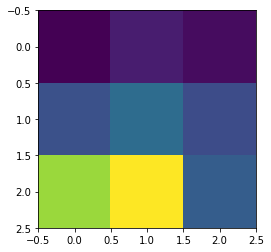

In [129]:
import matplotlib.pyplot as plt

grad_cam_plus_plus = GradCamPlusPlus(model,img_array,"fire9/concat")

plt.imshow(score_cam)
plt.show()

In [120]:
def superimpose(original_img_path, cam, emphasize=False):
    
    img_bgr = cv2.imread(original_img_path)

    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, 0.5, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb


In [130]:
grad_cam_plus_plus_superimposed = superimpose('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Y_test.jpg', grad_cam_plus_plus)

<function matplotlib.pyplot.show>

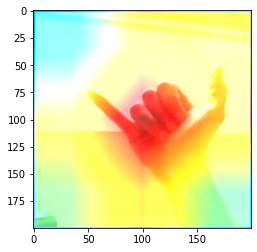

In [131]:
plt.imshow(grad_cam_plus_plus_superimposed)
plt.show

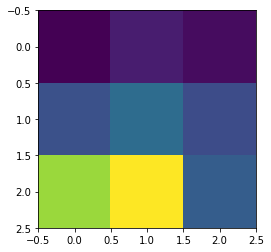

<function matplotlib.pyplot.show>

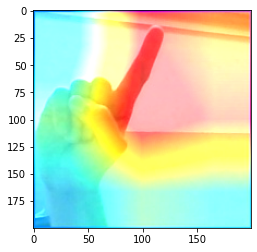

In [132]:
img_array = read_and_preprocess_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Z_test.jpg', size=(64,64))
grad_cam_plus_plus = GradCamPlusPlus(model,img_array,"fire9/concat")

plt.imshow(score_cam)
plt.show()

grad_cam_plus_plus_superimposed = superimpose('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/Z_test.jpg', grad_cam_plus_plus)
plt.imshow(grad_cam_plus_plus_superimposed)
plt.show

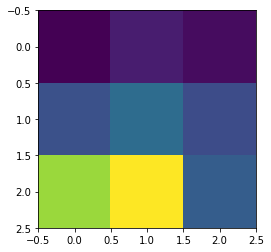

<function matplotlib.pyplot.show>

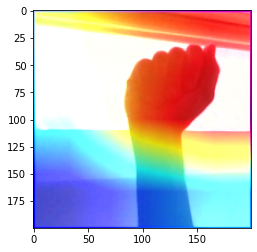

In [133]:
img_array = read_and_preprocess_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg', size=(64,64))
grad_cam_plus_plus = GradCamPlusPlus(model,img_array,"fire9/concat")

plt.imshow(score_cam)
plt.show()

grad_cam_plus_plus_superimposed = superimpose('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg', grad_cam_plus_plus)
plt.imshow(grad_cam_plus_plus_superimposed)
plt.show

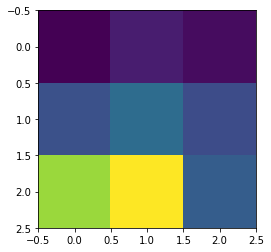

<function matplotlib.pyplot.show>

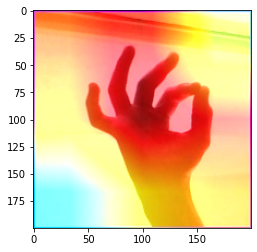

In [134]:
img_array = read_and_preprocess_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/F_test.jpg', size=(64,64))
grad_cam_plus_plus = GradCamPlusPlus(model,img_array,"fire9/concat")

plt.imshow(score_cam)
plt.show()

grad_cam_plus_plus_superimposed = superimpose('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/F_test.jpg', grad_cam_plus_plus)
plt.imshow(grad_cam_plus_plus_superimposed)
plt.show

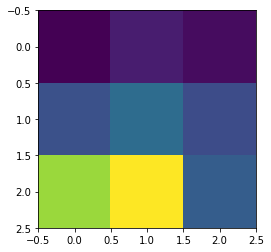

<function matplotlib.pyplot.show>

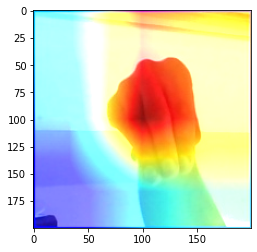

In [135]:
img_array = read_and_preprocess_img('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/M_test.jpg', size=(64,64))
grad_cam_plus_plus = GradCamPlusPlus(model,img_array,"fire9/concat")

plt.imshow(score_cam)
plt.show()

grad_cam_plus_plus_superimposed = superimpose('/content/asl-alphabet/asl_alphabet_test/asl_alphabet_test/M_test.jpg', grad_cam_plus_plus)
plt.imshow(grad_cam_plus_plus_superimposed)
plt.show

In [ ]:
for idx in range(len(model.layers)):
  print(idx)
  print(model.get_layer(index = idx).name)

0
input_1
1
conv1
2
relu_conv1
3
pool1
4
fire2/squeeze1x1
5
fire2/relu_squeeze1x1
6
fire2/expand1x1
7
fire2/expand3x3
8
fire2/relu_expand1x1
9
fire2/relu_expand3x3
10
fire2/concat
11
fire3/squeeze1x1
12
fire3/relu_squeeze1x1
13
fire3/expand1x1
14
fire3/expand3x3
15
fire3/relu_expand1x1
16
fire3/relu_expand3x3
17
fire3/concat
18
pool3
19
fire4/squeeze1x1
20
fire4/relu_squeeze1x1
21
fire4/expand1x1
22
fire4/expand3x3
23
fire4/relu_expand1x1
24
fire4/relu_expand3x3
25
fire4/concat
26
fire5/squeeze1x1
27
fire5/relu_squeeze1x1
28
fire5/expand1x1
29
fire5/expand3x3
30
fire5/relu_expand1x1
31
fire5/relu_expand3x3
32
fire5/concat
33
pool5
34
fire6/squeeze1x1
35
fire6/relu_squeeze1x1
36
fire6/expand1x1
37
fire6/expand3x3
38
fire6/relu_expand1x1
39
fire6/relu_expand3x3
40
fire6/concat
41
fire7/squeeze1x1
42
fire7/relu_squeeze1x1
43
fire7/expand1x1
44
fire7/expand3x3
45
fire7/relu_expand1x1
46
fire7/relu_expand3x3
47
fire7/concat
48
fire8/squeeze1x1
49
fire8/relu_squeeze1x1
50
fire8/expand1x1
51


In [ ]:
print(model.output)

Tensor("capsnet/Sqrt:0", shape=(?, 29), dtype=float32)


In [ ]:
primarycaps = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="1", count=1)

primarycaps1 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="2", count=2)

primarycaps2 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="3", count=3)


capsule = layers.concatenate([primarycaps, primarycaps1, primarycaps2], axis=-1)
   
digitcaps = CapsuleLayer(num_capsule=29, dim_capsule=2, routings=2,
                             name='digitcaps')(capsule)
    

out_caps = Length(name='capsnet')(digitcaps)

model = models.Model([mod.input], [out_caps])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [ ]:
summary=model.fit_generator(train_generator, epochs=3, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/SqueezeCapsMultiLane-3layers_model.h5")

Epoch 1/3
136/136 [==============================] - 91s 666ms/step - loss: 0.4139 - acc: 0.9837
Epoch 2/3
136/136 [==============================] - 89s 656ms/step - loss: 0.1078 - acc: 0.9962
Epoch 3/3
136/136 [==============================] - 89s 652ms/step - loss: 0.0741 - acc: 0.9961


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[568   0   0   0  10   0   0   0   0   0   0   0   0   0   4   0   0   0
   18   0   0   0   0   0   0   0   0   0   0]
 [  0 598   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 521   3   0   0   0   0   0   0   0   0   0   0  73   0   0   0
    3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 564   9   0   0   0   0   0   0   0   0   0  27   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 578   0   0   0   0   0   0   0   3   0   6   0   0   0
   13   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 597   0   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0 516  64   0   2   1   0   5   2   0   2   0   0
    7   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 596   0   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  

In [ ]:
primarycaps = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="1", count=1)

primarycaps1 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="2", count=2)

primarycaps2 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="3", count=3)


capsule = layers.concatenate([primarycaps, primarycaps1, primarycaps2], axis=-1)
   
digitcaps = CapsuleLayer(num_capsule=29, dim_capsule=2, routings=2,
                             name='digitcaps')(capsule)
    

out_caps = Length(name='capsnet')(digitcaps)

model = models.Model([mod.input], [out_caps])

Instructions for updating:
dim is deprecated, use axis instead


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/squ

In [ ]:
summary=model.fit_generator(train_generator, epochs=5, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/SqueezeCapsMultiLane-3layers5epochs_model.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
136/136 [==============================] - 98s 718ms/step - loss: 0.8073 - acc: 0.8602
Epoch 2/5
136/136 [==============================] - 93s 682ms/step - loss: 0.1336 - acc: 0.9923
Epoch 3/5
136/136 [==============================] - 93s 682ms/step - loss: 0.0983 - acc: 0.9910
Epoch 4/5
136/136 [==============================] - 92s 677ms/step - loss: 0.0580 - acc: 0.9983
Epoch 5/5
136/136 [==============================] - 91s 670ms/step - loss: 0.0561 - acc: 0.9957


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[575   0   0   0  21   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   3   0   0   0   0   0   0]
 [  0 589   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  0   0 583   0   0   0   0   0   0   0   0   0   0   0  17   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 599   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 574   0   0   0   0   0   0   0   0   0   7   0   0   0
   14   0   0   0   0   2   0   0   0   0   0]
 [  0   0   5   3   0 575   0   0   0   0   0   0   0   0  17   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0  10   0 560   0   5   0   9   0   0   1   0   1   0   2
    0   0   0   4   1   0   0   0   0   6   0]
 [  0   0   0   0   0   0  60 538   0   0   0   0   0   0   0   0   0   0
    2   0   0   0   0   0   0   0  

In [ ]:
primarycaps = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="1", count=1)

primarycaps1 = PrimaryCap(mod.output, dim_capsule=4, n_channels=16, kernel_size=3, strides=1, padding='valid', name="2", count=2)

capsule = layers.concatenate([primarycaps, primarycaps1], axis=-1)
   
digitcaps = CapsuleLayer(num_capsule=29, dim_capsule=2, routings=2,
                             name='digitcaps')(capsule)
    

out_caps = Length(name='capsnet')(digitcaps)

model = models.Model([mod.input], [out_caps])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 31, 31, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 31, 31, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 15, 15, 64)   0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [ ]:
summary=model.fit_generator(train_generator, epochs=3, steps_per_epoch=steps_per_epoch)
model.save("/content/drive/MyDrive/SqueezeCapsMultiLane-2layers3epochs_model.h5")

Epoch 1/3
136/136 [==============================] - 92s 677ms/step - loss: 0.5592 - acc: 0.9837
Epoch 2/3
136/136 [==============================] - 91s 669ms/step - loss: 0.1540 - acc: 0.9966
Epoch 3/3
136/136 [==============================] - 91s 666ms/step - loss: 0.1032 - acc: 0.9965


In [ ]:
validation_generator=datagen.flow_from_directory("/content/asl-alphabet/asl_alphabet_train/asl_alphabet_train", subset='validation', batch_size=512, target_size=(64,64), seed=72, shuffle= False)
pred= model.predict_generator(validation_generator, steps=validation_steps)
import numpy as np

predicted_class_indices=np.argmax(pred,axis=1)
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, predicted_class_indices))

from sklearn.metrics import classification_report
print(classification_report(y_true,predicted_class_indices))

Found 17400 images belonging to 29 classes.
[[509   0   0   0   0   0   0   0   0   0   0   0  44   5   1   0   0   0
    0  30   0   0  11   0   0   0   0   0   0]
 [  0 593   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   6   0   0   0   0   0   0   0   0]
 [  0   0 581   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 593   0   0   0   0   0   0   0   0   0   0   0   0   0   7
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   3 528   0   0   0   6   0   0   0   7   3   7   0   0   0
   25   7   1   0   5   5   0   0   0   0   0]
 [  0   0   0   0   0 583   0   0   0   0   0   0   0   0  17   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 516   0   4   1   8   0   1   6   0   3   0   5
    0   0   8  28   0   0   0   0   0   0  20]
 [  0   0   0   0   0   1   0 585   0   5   2   0   0   3   0   2   0   0
    0   0   0   0   0   0   2   0  